# Outlier detection with isolation forests

In [1]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import IsolationForest
import warnings

warnings.filterwarnings("ignore")

rng = np.random.RandomState(42)

## Data loading

In [2]:
%run ../util/load_data.py
%run ../util/data_visualization.py
%run ../util/outliers_statistics.py

data = load_data("../data")

train_data_with_outliers = data['train_data'][data['numerical_attributes'] + ['Id']]

### Outlier detection with Isolation Forests

In [3]:
kf = KFold(n_splits=10)

outliers_ids = []

for train, test in kf.split(train_data_with_outliers):
    train_data = train_data_with_outliers.iloc[train, :]
    test_data = train_data_with_outliers.iloc[test, :]
    
    isolation_forest_classifier = IsolationForest(random_state=rng, behaviour='new')
    isolation_forest_classifier.fit(train_data)
    
    prediction_result = zip(
        train_data_with_outliers['Id'].values, 
        isolation_forest_classifier.predict(test_data)
    )
    
    outliers_ids += [id for id, is_not_outlier in prediction_result if is_not_outlier < 0]

### Outlier removal

In [4]:
train_data = data['train_data']

data_without_isolation_forests_outliers = train_data[~train_data['Id'].isin(outliers_ids)]
data_without_isolation_forests_outliers.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Type
9,10,2612,59,10,247,11,636,228,219,124,6230,5,9,1
17,18,2517,72,7,85,6,595,228,227,133,5607,5,8,1
37,38,2511,92,7,182,18,722,231,229,131,5494,5,8,1
60,61,2490,75,5,134,17,810,227,230,137,5218,5,8,1
64,65,2500,49,14,150,27,870,225,210,116,5205,5,8,1


# Visualization

##### Create new array of colors with outlier

In [5]:
copy_train_data = data['train_data'][data['numerical_attributes'] + data['target'] + ['Id']].copy()
color = [row[data['target'][0]] if row['Id'] not in outliers_ids else -10 for index,row in copy_train_data.iterrows()]

### PCA Visualization

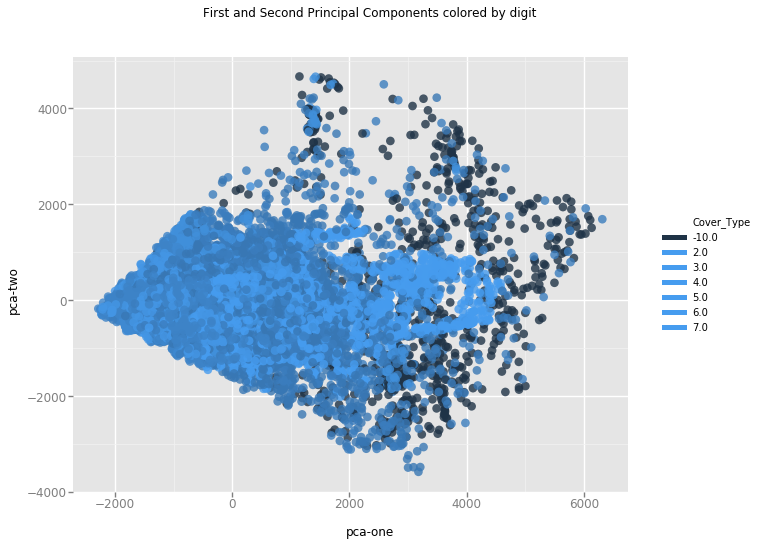

<ggplot: (297442915)>

In [6]:
pca_visualization(data['train_data'][data['numerical_attributes'] + data['target']], data['target'][0], color)

### TSNE

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 15120 samples in 0.016s...
[t-SNE] Computed neighbors for 15120 samples in 1.014s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15120
[t-SNE] Computed conditional probabilities for sample 2000 / 15120
[t-SNE] Computed conditional probabilities for sample 3000 / 15120
[t-SNE] Computed conditional probabilities for sample 4000 / 15120
[t-SNE] Computed conditional probabilities for sample 5000 / 15120
[t-SNE] Computed conditional probabilities for sample 6000 / 15120
[t-SNE] Computed conditional probabilities for sample 7000 / 15120
[t-SNE] Computed conditional probabilities for sample 8000 / 15120
[t-SNE] Computed conditional probabilities for sample 9000 / 15120
[t-SNE] Computed conditional probabilities for sample 10000 / 15120
[t-SNE] Computed conditional probabilities for sample 11000 / 15120
[t-SNE] Computed conditional probabilities for sample 12000 / 15120
[t-SNE] Computed conditional probabilities for sa

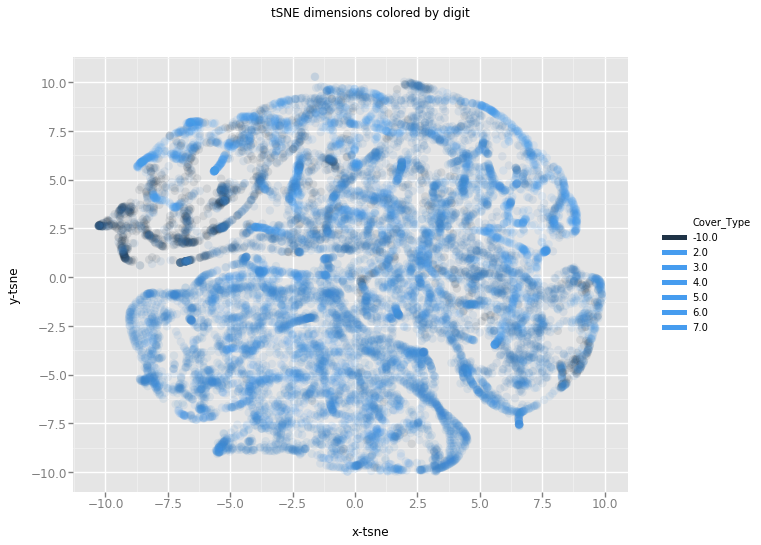

<ggplot: (298256332)>

In [7]:
tsne_visualization(data['train_data'][data['numerical_attributes'] + data['target']], data['target'][0], color)

### UMAP

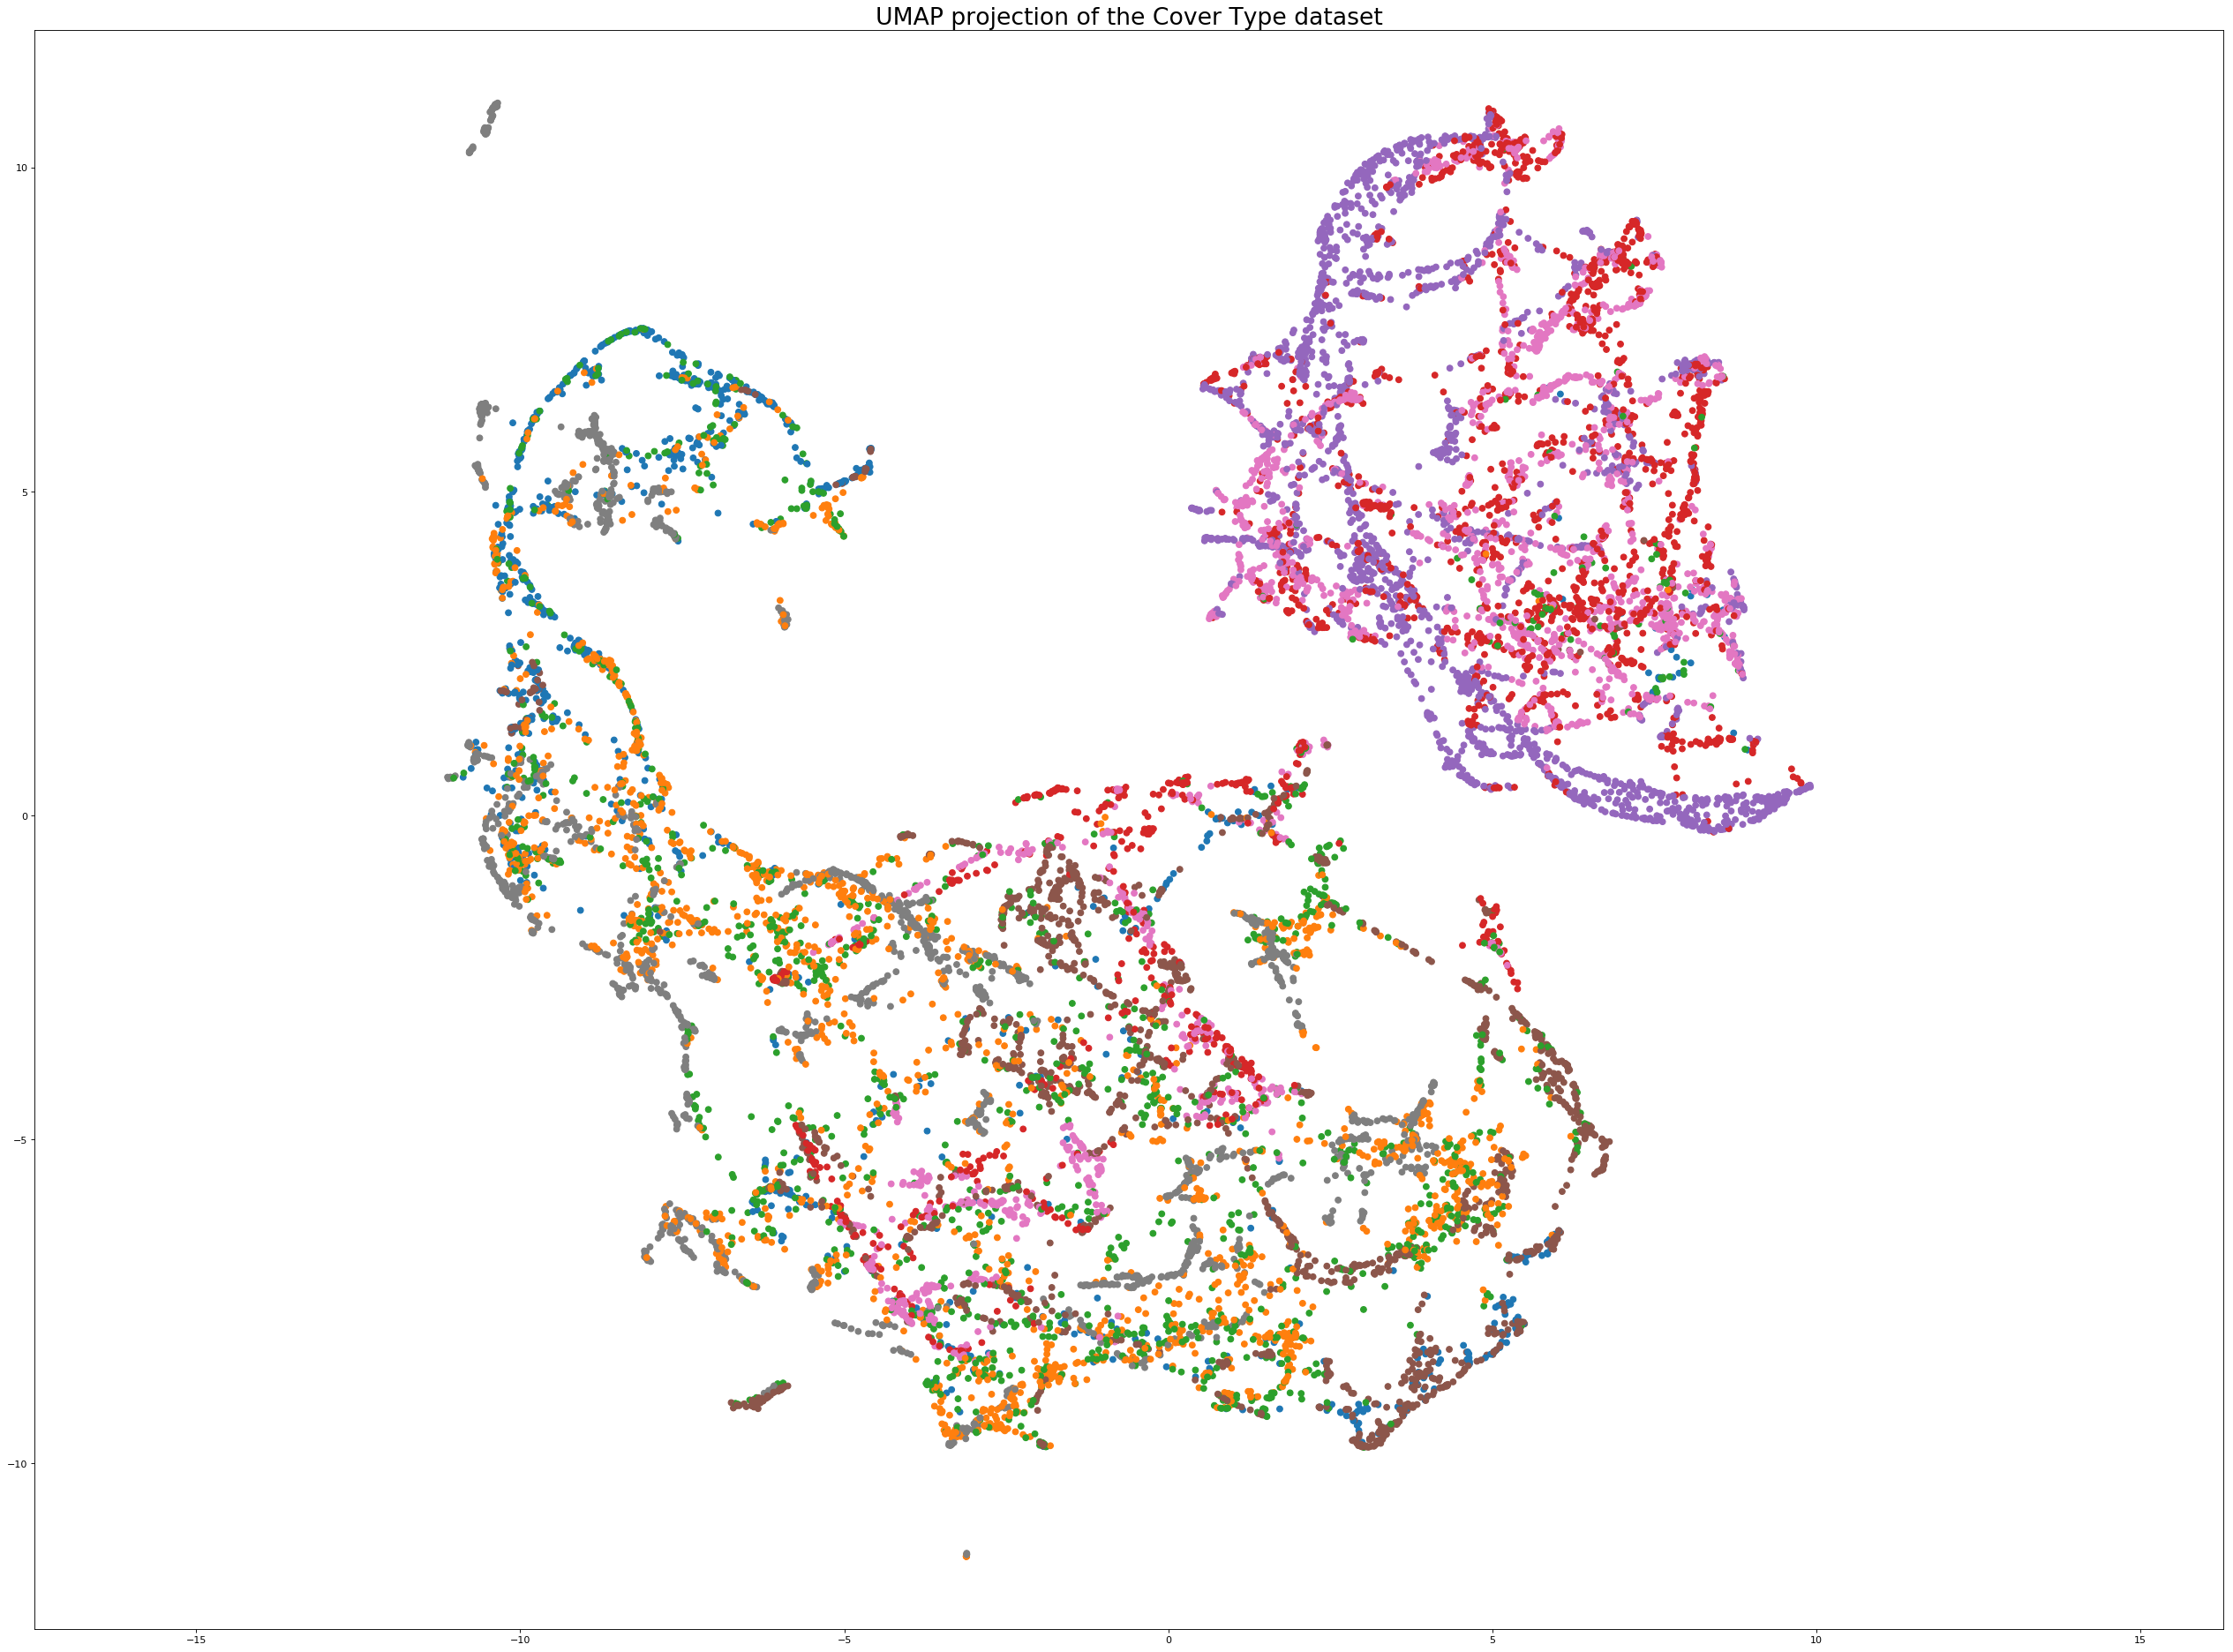

In [8]:
umap_visualization(data['train_data'][data['numerical_attributes'] + data['target']], data['target'][0], color)

In [9]:
precision, recall, F1_score = outliers_statistics(outliers_ids)
print("Precision: "+ str(precision))
print("Recall: "+ str(recall))
print("F1-score: "+ str(F1_score))

Precision: 1
Recall: 0.0
F1-score: 0.0
